In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S2/Office_Amelie-S2.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:3600]
test_data = df.iloc[3600:]

In [5]:
len(train_data),len(test_data)

(3600, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),12):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+12, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (298, 24, 1)
y_train.shape =  (298, 12)
X_test.shape =  (58, 24, 1)
y_test.shape =  (58, 12)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(24, activation='tanh'))
model.add(Dense(12))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 24)            2496      
                                                                 
 lstm_1 (LSTM)               (None, 24)                4704      
                                                                 
 dense (Dense)               (None, 12)                300       
                                                                 
Total params: 7,500
Trainable params: 7,500
Non-trainable params: 0
_________________________________________________________________


In [14]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
3/3 [==============================] - 4s 28ms/step - loss: 618.0970
Epoch 2/300
3/3 [==============================] - 0s 24ms/step - loss: 588.3915
Epoch 3/300
3/3 [==============================] - 0s 24ms/step - loss: 555.4903
Epoch 4/300
3/3 [==============================] - 0s 27ms/step - loss: 521.3657
Epoch 5/300
3/3 [==============================] - 0s 25ms/step - loss: 490.6886
Epoch 6/300
3/3 [==============================] - 0s 30ms/step - loss: 462.4190
Epoch 7/300
3/3 [==============================] - 0s 25ms/step - loss: 437.2338
Epoch 8/300
3/3 [==============================] - 0s 23ms/step - loss: 413.4939
Epoch 9/300
3/3 [==============================] - 0s 25ms/step - loss: 391.5981
Epoch 10/300
3/3 [==============================] - 0s 25ms/step - loss: 371.2574
Epoch 11/300
3/3 [==============================] - 0s 25ms/step - loss: 352.3927
Epoch 12/300
3/3 [==============================] - 0s 26ms/step - loss: 334.9547
Epoch 13/300
3/3 [=======

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for Stacked LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for Stacked LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for Stacked LSTM Model for training is:',mae_train)
print('Mean Absolute Error for Stacked LSTM Model for testing is:',mae_test)
print('MAPE for Stacked Model for training is:',mape_train)
print('MAPE for Stacked Model for testing is:',mape_test)

Root Mean Squared Error for Stacked LSTM Model for training is: 14.275748071195306
Root Mean Squared Error for Stacked LSTM Model for testing is: 34.59641339419606
Mean Absolute Error for Stacked LSTM Model for training is: 12.508385136132803
Mean Absolute Error for Stacked LSTM Model for testing is: 24.524939318689803
MAPE for Stacked Model for training is: 0.8217114560030901
MAPE for Stacked Model for testing is: 0.5296449956643362


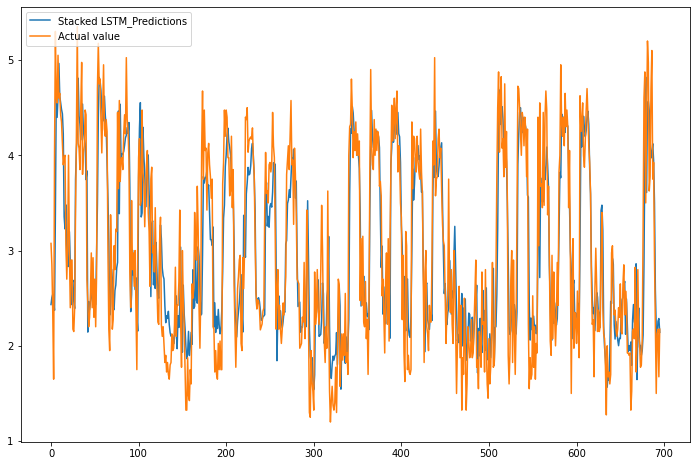

In [ ]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='Stacked LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([3.07500005]), array([2.4332683], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.64173174]), array([0.34183788]), array([-0.1921916]), array([-0.82315266]), array([1.62737107]), array([1.90623665]), array([-0.03776503]), array([0.1522727]), array([0.43477058]), array([-0.36436796]), array([0.02895784]), array([-0.12884617]), array([-0.1311779]), array([-0.31047058]), array([-0.32259798]), array([0.61981559]), array([0.77363396]), array([-0.40465403]), array([-0.14622283]), array([0.21497416]), array([1.16712737]), array([-0.19839764]), array([-0.47010422]), array([0.46768856]), array([0.24536324]), array([-0.51375556]), array([-0.32157445]), array([0.00858283]), array([-0.34851265]), array([0.1598382]), array([1.12229729]), array([-0.68426609]), array([-0.33969116]), array([-0.47894669]), array([0.33715725]), array([0.62246513]), array([-0.73827386]), array([-0.22881126]), array([-0.07824564]), array([0.3525939]), array([0.68085337]), array([-1.13702369]), array([0.30586362]), array([-0.26471162]), array([-0.07729006]), array([0.08962846]), array([0.47140

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([1.90623665]), array([-1.33714128]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(369, 327)